<a href="https://colab.research.google.com/github/saikrishna1108/ECGR_5105_Final_Project/blob/main/ClassicalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
data = pd.read_csv(r"C:\Users\saikr\Desktop\ML_Final_Project\train_dataframe.csv")
removed_column = data.pop('label')
Y = pd.DataFrame({'age group': removed_column})
X = data
X.shape

(30694, 23)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y_train, encoder = get_labels(y_train)
y_test = encoder.transform(y_test)
y_test = y_test.ravel()
y_train = y_train.ravel()
y_test[:50]

C:\Users\saikr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 7, 1, 6, 6, 7, 6, 4, 1, 6, 1, 2, 2, 7, 5, 1, 4, 7, 4, 7, 6, 6,
       7, 7, 1, 7, 7, 6, 4, 6, 6, 1, 1, 7, 1, 7, 6, 7, 7, 1, 6, 4, 3, 7,
       6, 1, 5, 2, 6, 4])

In [7]:
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
n = X.shape[1]

In [8]:


# Assuming x_train, y_train, x_test, y_test are your training and testing data

# Linear Regression
linear_reg_model = LinearRegression()

# Training the model
linear_reg_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_linear = linear_reg_model.predict(x_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error (Linear Regression): {mse_linear}")

# If you want to access the coefficients and intercept:
coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Accuracy for regression is not applicable, but you can print R-squared
r_squared = linear_reg_model.score(x_test, y_test)
print(f"R-squared (Linear Regression): {r_squared}")


Mean Squared Error (Linear Regression): 4.784751932118226
Coefficients: [ 0.15263885  0.10455818 -0.25643841 -0.07949798  0.29272398 -0.09871471
 -0.0756885   0.12767099 -0.03035823  0.07590471 -0.05310831  0.10672793
 -0.1317305   0.13382866 -0.16343016 -0.12536358 -0.18167868  0.1838082
  0.04962402  0.21386255  0.03666087  0.12658821 -0.17229504]
Intercept: 4.783262064752595
R-squared (Linear Regression): 0.05904036812111235


C:\Users\saikr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saikr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saikr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: 

Accuracy (Logistic Regression): 0.36064505619807785
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.28      0.06      0.10       806
           2       0.28      0.10      0.15       851
           3       0.00      0.00      0.00       122
           4       0.37      0.07      0.12       393
           5       0.48      0.03      0.05       470
           6       0.33      0.39      0.36      1522
           7       0.38      0.74      0.50      1948

    accuracy                           0.36      6139
   macro avg       0.27      0.17      0.16      6139
weighted avg       0.34      0.36      0.29      6139

Confusion Matrix (Logistic Regression):
 [[   0    2    2    0    0    0   11   12]
 [   0   50   51    0   13    2  288  402]
 [   0   19   84    1   14    4  208  521]
 [   0    3   10    0    1    0   36   72]
 [   0   34   20    0   29    0  135  

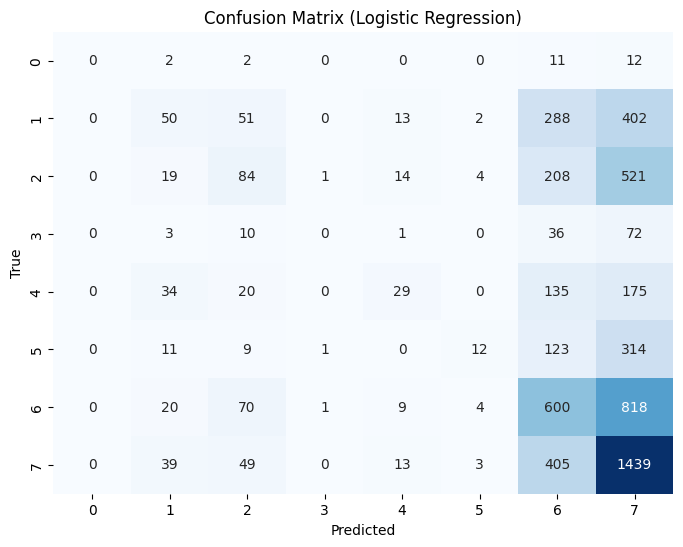

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined and properly formatted

# Logistic Regression
logistic_reg_model = LogisticRegression()

# Training the model
logistic_reg_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_logistic = logistic_reg_model.predict(x_test)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f"Accuracy (Logistic Regression): {accuracy_logistic}")
print("Classification Report (Logistic Regression):\n", classification_report_logistic)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logistic)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=logistic_reg_model.classes_, yticklabels=logistic_reg_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


Accuracy (SVC with RBF kernel): 0.7895422707281317
Classification Report (SVC with RBF kernel):
               precision    recall  f1-score   support

           0       1.00      0.81      0.90        27
           1       0.82      0.79      0.81       806
           2       0.76      0.77      0.77       851
           3       0.82      0.75      0.78       122
           4       0.86      0.82      0.84       393
           5       0.83      0.63      0.71       470
           6       0.78      0.79      0.79      1522
           7       0.77      0.83      0.80      1948

    accuracy                           0.79      6139
   macro avg       0.83      0.77      0.80      6139
weighted avg       0.79      0.79      0.79      6139

Confusion Matrix (SVC with RBF kernel):
 [[  22    0    1    0    0    1    1    2]
 [   0  639   29    4    3    6   51   74]
 [   0   18  652    3    9    6   69   94]
 [   0    4    5   91    2    1   11    8]
 [   0   10   10    2  321    2   15   

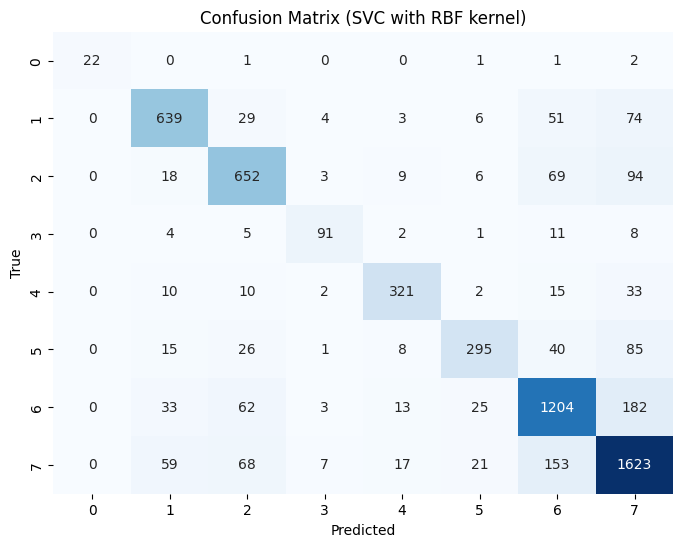

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Create and train the SVM model with RBF kernel
svc_model_rbf = SVC(kernel='rbf', C=10)
svc_model_rbf.fit(x_train, y_train)

# Predicting on the test set
y_pred_svc_rbf = svc_model_rbf.predict(x_test)

# Evaluating the model
accuracy_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)
classification_report_svc_rbf = classification_report(y_test, y_pred_svc_rbf)
conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)

print(f"Accuracy (SVC with RBF kernel): {accuracy_svc_rbf}")
print("Classification Report (SVC with RBF kernel):\n", classification_report_svc_rbf)
print("Confusion Matrix (SVC with RBF kernel):\n", conf_matrix_svc_rbf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc_rbf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=svc_model_rbf.classes_, yticklabels=svc_model_rbf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVC with RBF kernel)')
plt.show()


Accuracy (KNeighborsClassifier): 0.8540478905359179
Classification Report (KNeighborsClassifier):
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.87      0.87       806
           2       0.83      0.86      0.84       851
           3       0.73      0.89      0.80       122
           4       0.85      0.92      0.88       393
           5       0.86      0.78      0.82       470
           6       0.85      0.86      0.85      1522
           7       0.88      0.85      0.86      1948

    accuracy                           0.85      6139
   macro avg       0.84      0.85      0.85      6139
weighted avg       0.86      0.85      0.85      6139

Confusion Matrix (KNeighborsClassifier):
 [[  22    0    1    1    0    2    1    0]
 [   1  702   24    4    9    7   30   29]
 [   0   15  734    4    9    4   40   45]
 [   0    3    0  109    4    0    3    3]
 [   0    3    4    2  360    0   14

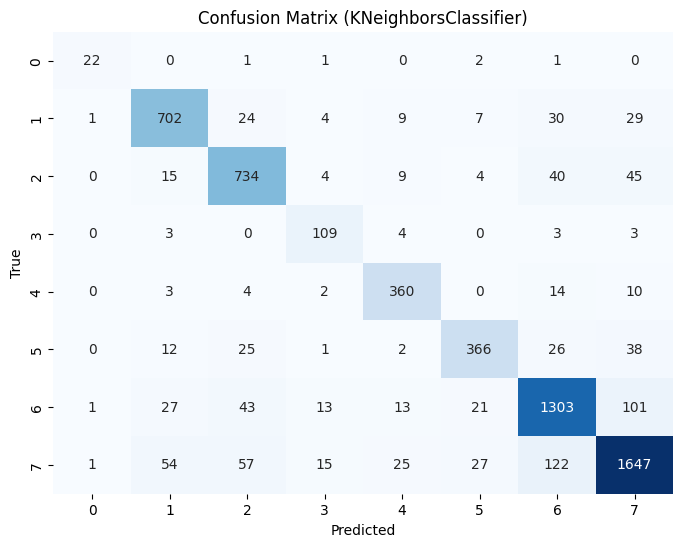

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined and properly formatted

# Create KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=1)  # You can adjust the number of neighbors (n_neighbors) as needed

# Training the model
knn_model.fit(x_train, y_train)

# Predicting on the test set
y_pred_knn = knn_model.predict(x_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy (KNeighborsClassifier): {accuracy_knn}")
print("Classification Report (KNeighborsClassifier):\n", classification_report_knn)
print("Confusion Matrix (KNeighborsClassifier):\n", conf_matrix_knn)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (KNeighborsClassifier)')
plt.show()
